Aula_5_1

import requisite libraries

In [1]:
# import requisite libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# fetch data and separate training data
data = pd.read_excel('proc1a.xls', skiprows = 1, usecols = 'C:AI')
data_train = data.iloc[0:69,]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1in    92 non-null     float64
 1   x2in    92 non-null     float64
 2   x3in    92 non-null     float64
 3   x4in    92 non-null     float64
 4   x5in    92 non-null     float64
 5   x6in    92 non-null     float64
 6   x7in    92 non-null     float64
 7   y1      92 non-null     float64
 8   y2      92 non-null     float64
 9   y3      92 non-null     float64
 10  y4      92 non-null     float64
 11  y5      92 non-null     float64
 12  y6      92 non-null     float64
 13  y7      92 non-null     float64
 14  y8      92 non-null     float64
 15  x8md    92 non-null     float64
 16  x9md    92 non-null     float64
 17  xamd    92 non-null     float64
 18  xbmd    92 non-null     float64
 19  xcmd    92 non-null     float64
 20  xdmd    92 non-null     float64
 21  xemd    92 non-null     float64
 22  xfmd

In [31]:
data

,x1in,x2in,x3in,x4in,x5in,x6in,x7in,y1,y2,y3,...,xgnx,xhnx,xinx,xjnx,xknx,xlnx,xmen,xnen,xoen,xpen
0,0.47,-1.66,-0.19,1.94,0.07,-4.54,-0.09,-1.13,0.62,0.24,...,-0.13,-0.12,0.24,0.22,-0.01,0.27,-0.21,0.38,0.09,-0.11
1,0.05,-0.83,0.04,0.75,0.25,-0.02,-0.60,-0.89,0.68,0.14,...,-0.17,-0.11,0.22,0.05,-0.08,0.18,-0.33,0.34,-0.04,-0.33
2,-0.58,-0.21,-0.08,0.89,0.34,0.12,-0.86,-0.81,0.77,0.12,...,0.07,-0.17,0.20,-0.02,-0.13,0.31,-0.41,0.22,0.04,-0.01
3,-0.90,0.11,0.16,1.43,0.45,0.13,-0.41,-0.70,0.69,0.21,...,0.17,-0.01,0.29,0.07,0.01,0.30,-0.49,0.30,-0.22,0.00
4,-0.78,-0.33,-0.34,1.51,0.50,-0.01,-0.31,-0.38,0.91,0.07,...,0.14,-0.05,0.26,0.06,-0.04,0.33,-0.58,0.23,-0.27,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-1.37,-0.77,-0.02,-1.36,-0.11,0.22,0.40,-0.26,0.69,-0.30,...,-1.86,0.66,0.69,1.37,1.01,1.18,-0.07,0.28,-1.69,-0.54
88,-1.30,-0.63,-0.19,-1.09,-0.06,-5.70,0.37,-0.38,0.61,-0.23,...,-2.11,1.07,0.95,1.67,1.40,1.28,0.04,0.35,-1.82,-1.13
89,-1.19,-0.03,0.11,-1.05,-0.09,0.09,0.66,-0.01,1.33,-0.97,...,-1.97,0.92,0.83,1.62,1.27,1.10,-4.16,0.37,-1.54,-0.92
90,-0.94,-0.06,0.71,-1.15,-0.06,-5.70,0.65,-0.29,0.79,-0.56,...,-2.07,0.83,0.78,1.28,1.12,1.13,-0.08,0.26,-1.85,-0.81


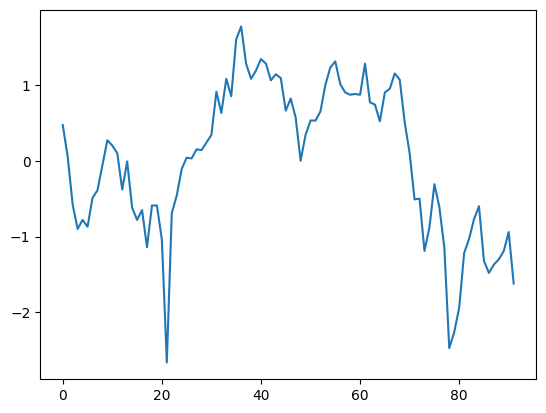

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data["x1in"])

In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1in    69 non-null     float64
 1   x2in    69 non-null     float64
 2   x3in    69 non-null     float64
 3   x4in    69 non-null     float64
 4   x5in    69 non-null     float64
 5   x6in    69 non-null     float64
 6   x7in    69 non-null     float64
 7   y1      69 non-null     float64
 8   y2      69 non-null     float64
 9   y3      69 non-null     float64
 10  y4      69 non-null     float64
 11  y5      69 non-null     float64
 12  y6      69 non-null     float64
 13  y7      69 non-null     float64
 14  y8      69 non-null     float64
 15  x8md    69 non-null     float64
 16  x9md    69 non-null     float64
 17  xamd    69 non-null     float64
 18  xbmd    69 non-null     float64
 19  xcmd    69 non-null     float64
 20  xdmd    69 non-null     float64
 21  xemd    69 non-null     float64
 22  xfmd

In [36]:
data_train

,x1in,x2in,x3in,x4in,x5in,x6in,x7in,y1,y2,y3,...,xgnx,xhnx,xinx,xjnx,xknx,xlnx,xmen,xnen,xoen,xpen
0,0.47,-1.66,-0.19,1.94,0.07,-4.54,-0.09,-1.13,0.62,0.24,...,-0.13,-0.12,0.24,0.22,-0.01,0.27,-0.21,0.38,0.09,-0.11
1,0.05,-0.83,0.04,0.75,0.25,-0.02,-0.60,-0.89,0.68,0.14,...,-0.17,-0.11,0.22,0.05,-0.08,0.18,-0.33,0.34,-0.04,-0.33
2,-0.58,-0.21,-0.08,0.89,0.34,0.12,-0.86,-0.81,0.77,0.12,...,0.07,-0.17,0.20,-0.02,-0.13,0.31,-0.41,0.22,0.04,-0.01
3,-0.90,0.11,0.16,1.43,0.45,0.13,-0.41,-0.70,0.69,0.21,...,0.17,-0.01,0.29,0.07,0.01,0.30,-0.49,0.30,-0.22,0.00
4,-0.78,-0.33,-0.34,1.51,0.50,-0.01,-0.31,-0.38,0.91,0.07,...,0.14,-0.05,0.26,0.06,-0.04,0.33,-0.58,0.23,-0.27,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.52,1.46,0.76,-1.03,-0.36,0.15,0.16,-1.15,-0.40,0.68,...,0.59,-0.68,-0.45,-1.62,-0.80,-0.66,-0.17,-0.28,0.43,0.90
65,0.90,1.56,0.86,-1.14,-0.09,0.29,0.29,-0.96,-0.24,0.39,...,0.78,-0.63,-0.39,-1.16,-0.60,-0.55,-0.02,-0.12,0.65,0.41
66,0.95,0.01,-0.07,-0.85,-0.28,0.34,-0.35,-0.72,-0.30,0.33,...,0.86,-0.26,-0.16,-0.92,-0.26,-0.60,0.05,-0.04,0.66,-0.19
67,1.15,-0.41,-0.27,-0.85,-0.24,0.19,0.04,-0.84,-0.23,0.38,...,0.81,-0.35,-0.23,-0.95,-0.37,-0.33,-0.07,-0.07,0.78,-0.19


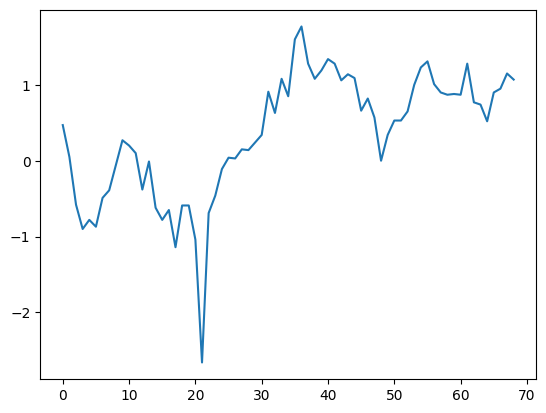

In [37]:
import matplotlib.pyplot as plt
plt.plot(data_train.index, data_train["x1in"])

In [5]:
# normalize data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)

In [45]:
# confirm no correlation
corr_coef = np.corrcoef(data_train_normal, rowvar = False)
print('Correlation matrix: \n', corr_coef[0:3,0:3]) # printing only a portion

Correlation matrix: 
 [[1.         0.23697456 0.38232242]
 [0.23697456 1.         0.64229595]
 [0.38232242 0.64229595 1.        ]]


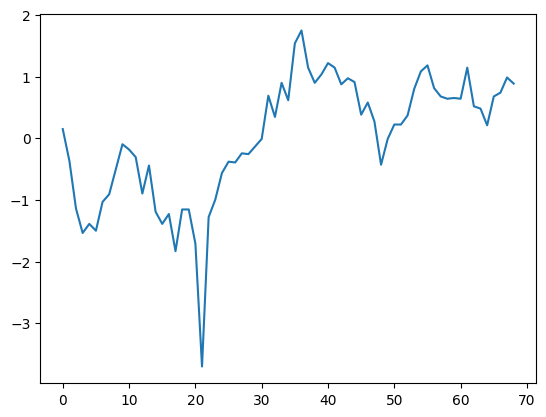

In [41]:
import matplotlib.pyplot as plt
plt.plot(data_train_normal[:,0])

In [44]:
# PCA
pca = PCA()
score_train = pca.fit_transform(data_train_normal)
print(score_train)
#print(pca.explained_variance_ratio_)

[[-3.13567818e+00  6.98524669e-01  4.21512436e+00 ...  6.55633603e-03
  -1.63656288e-02 -4.44619796e-04]
 [-2.41859631e+00  2.03755715e-01  3.19052028e+00 ...  2.19162255e-01
  -6.65076407e-02  2.42339528e-03]
 [-1.84872816e+00  3.21696864e-01  3.74358250e+00 ...  1.21199952e-01
   9.14625408e-02 -2.85745514e-03]
 ...
 [ 2.11264293e+00 -2.37124334e+00 -8.24050777e-02 ... -1.14989382e-01
   9.33187839e-02  2.70253860e-03]
 [ 1.98584160e+00 -2.27975777e+00  2.24309407e-01 ...  7.81995031e-02
   1.05277838e-01 -2.85030836e-04]
 [ 1.52808935e+00 -2.93512763e+00  8.17495002e-02 ... -2.47544074e-02
  -1.46165630e-02 -8.51068689e-04]]


In [7]:
# confirm no correlation
corr_coef = np.corrcoef(score_train, rowvar = False)
print('Correlation matrix: \n', corr_coef[0:3,0:3]) # printing only a portion

Correlation matrix: 
 [[ 1.00000000e+00  3.71544006e-16 -1.93566117e-16]
 [ 3.71544006e-16  1.00000000e+00 -1.63473731e-17]
 [-1.93566117e-16 -1.63473731e-17  1.00000000e+00]]


(Text(0, 0.5, 'Explained variance (in %)'),
 Text(0.5, 0, 'Principal component number'),
 <matplotlib.legend.Legend at 0x1ac000fb230>)

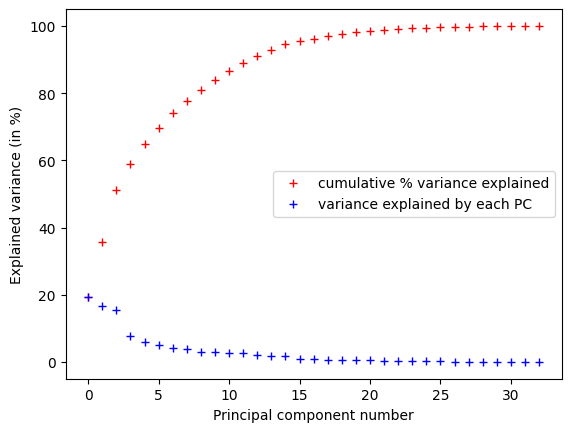

In [9]:
# visualize explained variance
import matplotlib.pyplot as plt
explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained
plt.figure()
plt.plot(cum_explained_variance, 'r+', label = 'cumulative % variance explained')
plt.plot(explained_variance, 'b+', label = 'variance explained by each PC')
plt.ylabel('Explained variance (in %)'), plt.xlabel('Principal component number'), plt.legend()

In [10]:
# decide # of PCs to retain and compute reduced data in PC space
n_comp = np.argmax(cum_explained_variance >= 90) + 1
score_train_reduced = score_train[:,0:n_comp]
print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  13


In [11]:
# confirm that only about 10% of original information is lost
from sklearn.metrics import r2_score
V_matrix = pca.components_.T
P_matrix = V_matrix[:,0:n_comp]
data_train_normal_reconstruct = np.dot(score_train_reduced, P_matrix.T)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct)
print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


In [12]:
# alternative approach
pca = PCA(n_components = 0.9)
score_train_reduced = pca.fit_transform(data_train_normal)
data_train_normal_reconstruct = pca.inverse_transform(score_train_reduced)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct)
print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


In [14]:
# calculate T2 for training data
lambda_k = np.diag(pca.explained_variance_[0:n_comp]) # eigenvalue = explained variance
lambda_k_inv = np.linalg.inv(lambda_k)
T2_train = np.zeros((data_train_normal.shape[0],))
for i in range(data_train_normal.shape[0]):
    T2_train[i] = np.dot(np.dot(score_train_reduced[i,:],lambda_k_inv),score_train_reduced[i,:].T)

In [48]:
print('n_comp= ', n_comp)
print('lambda_k= ', lambda_k)
print('T2_train= ', T2_train)

n_comp=  13
lambda_k=  [[6.42279766 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         5.52934815 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         5.21780479 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         2.57592955 0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         1.94905677 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.6546663
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.42445525 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.      

In [15]:
# calculate Q for training data
error_train = data_train_normal - data_train_normal_reconstruct
Q_train = np.sum(error_train*error_train, axis = 1)

In [49]:
print('data_train_normal= ', data_train_normal)
print('data_train_normal_reconstruct= ', data_train_normal_reconstruct)
print('error_train= ', error_train) 
print('Q_train= ', Q_train)

data_train_normal=  [[ 0.14859111 -1.68955301 -0.33388245 ...  0.42658566 -0.47635436
  -0.50909336]
 [-0.36773627 -0.8845555  -0.10199123 ...  0.38314003 -0.77185219
  -0.77530202]
 [-1.14222734 -0.28323206 -0.22297795 ...  0.25280316 -0.59000737
  -0.38808943]
 ...
 [ 0.73867954 -0.06985922 -0.21289573 ... -0.0295934   0.81928997
  -0.60589651]
 [ 0.98454972 -0.47720736 -0.41454027 ... -0.06217761  1.09205719
  -0.60589651]
 [ 0.88620165 -1.37919253 -1.10013173 ... -0.0404548   0.66017575
  -0.90840635]]
data_train_normal_reconstruct=  [[-0.01417356 -2.08039808 -0.67408136 ...  0.19936655 -0.4451065
  -0.33456228]
 [-1.02271332 -0.51197839 -0.55500546 ...  0.40354173 -1.1144107
  -0.69331188]
 [-1.0379027  -0.31529089 -0.50843974 ...  0.18331896 -1.01749818
  -0.46156245]
 ...
 [ 0.4370115  -0.06037524 -0.34207171 ... -0.08899288  0.8250002
  -0.16558535]
 [ 0.55157694 -0.16143918 -0.43645482 ... -0.06431489  0.79402729
  -0.12686722]
 [ 0.53879364 -0.6078483  -0.93939391 ...  0.0741

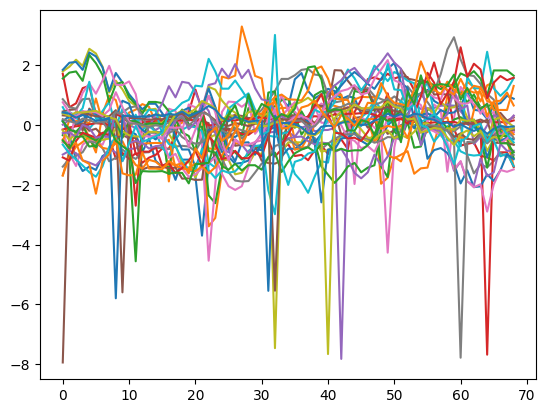

In [50]:
plt.plot(data_train_normal)

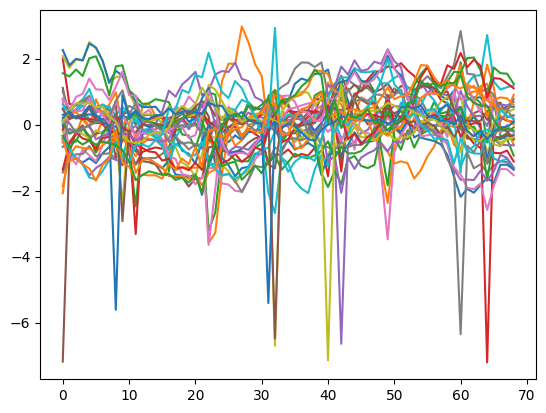

In [51]:
plt.plot(data_train_normal_reconstruct)

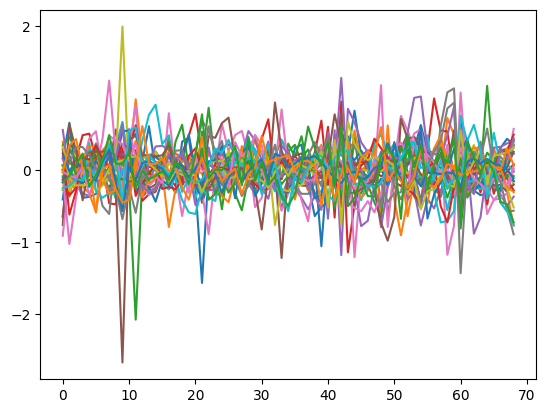

In [52]:
plt.plot(error_train)

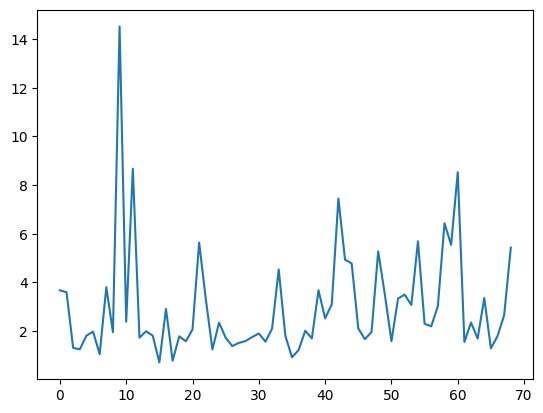

In [53]:
plt.plot(Q_train)

In [54]:
# T2 control limit
import scipy.stats
N = data_train_normal.shape[0]
k = n_comp
alpha = 0.01 # 99% control limit
T2_CL = k*(N**2-1)*scipy.stats.f.ppf(1-alpha,k,N-k)/(N*(N-k))

In [55]:
print('T2 control limit= ', T2_CL)

T2 control limit=  39.48291089245049


In [19]:
print('eig_vals: ', pca.explained_variance_)

eig_vals:  [6.42279766 5.52934815 5.21780479 2.57592955 1.94905677 1.6546663
 1.42445525 1.27523465 1.03022819 1.00510271 0.86502803 0.83941879
 0.66681785]


In [56]:
# Q control limit
eig_vals = pca.explained_variance_
m = data_train_normal.shape[1]
print('m: ', m)
theta1 = np.sum(eig_vals[k:])
theta2 = np.sum([eig_vals[j]**2 for j in range(k,m)])
theta3 = np.sum([eig_vals[j]**3 for j in range(k,m)])
h0 = 1-2*theta1*theta3/(3*theta2**2)
z_alpha = scipy.stats.norm.ppf(1-alpha)
Q_CL = theta1*(z_alpha*np.sqrt(2*theta2*h0**2)/theta1+ 1 + theta2*h0*(1-h0)/theta1**2)**2

m:  33


In [57]:
print('Q control limit= ', Q_CL)

Q control limit=  3.758018322231988


(Text(0.5, 0, 'Sample #'), Text(0, 0.5, 'Q for training data'))

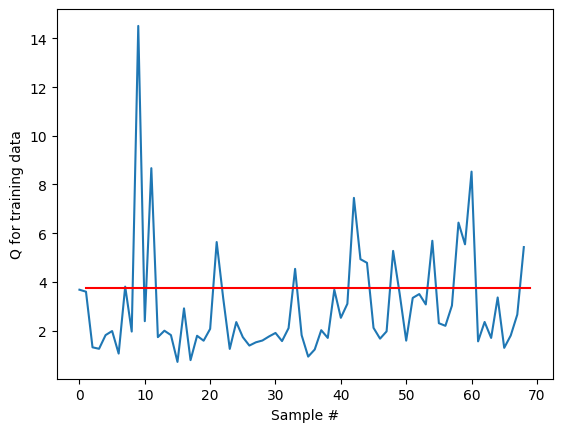

In [59]:
# Q_train plot with CL 
plt.figure() 
plt.plot(Q_train) 
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], color='red') 
plt.xlabel('Sample #'), plt.ylabel('Q for training data') 

(Text(0.5, 0, 'Sample #'), Text(0, 0.5, 'T$^2$ for training data'))

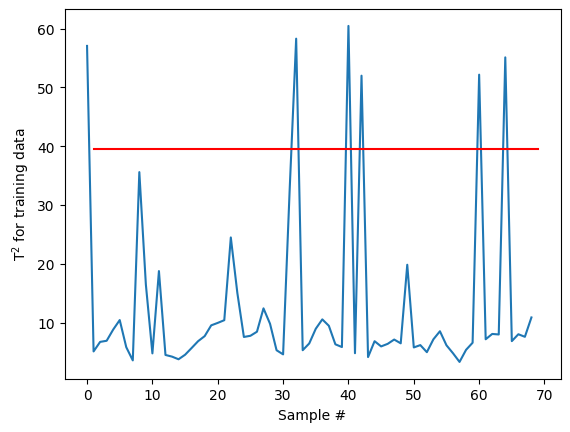

In [58]:
# T2_train plot with CL 
plt.figure() 
plt.plot(T2_train) 
plt.plot([1,len(T2_train)],[T2_CL,T2_CL], color='red') 
plt.xlabel('Sample #'), plt.ylabel('T$^2$ for training data')

In [60]:
# get test data, normalize it 
data_test = data.iloc[69:,] 
data_test_normal = scaler.transform(data_test) # using scaling parameters from training data 

In [61]:
# compute scores and reconstruct 
score_test = pca.transform(data_test_normal) 
score_test_reduced = score_test[:,0:n_comp] 
data_test_normal_reconstruct = np.dot(score_test_reduced, P_matrix.T) 

In [62]:
# calculate T2_test 
T2_test = np.zeros((data_test_normal.shape[0],)) 
for i in range(data_test_normal.shape[0]): # eigenvalues from training data are used 
    T2_test[i] = np.dot(np.dot(score_test_reduced[i,:],lambda_k_inv),score_test_reduced[i,:].T)

In [63]:
# calculate Q_test 
error_test = data_test_normal_reconstruct - data_test_normal 
Q_test = np.sum(error_test*error_test, axis = 1)

Diagnóstico de Falhas

Text(0, 0.5, 'T$^2$ contribution plot')

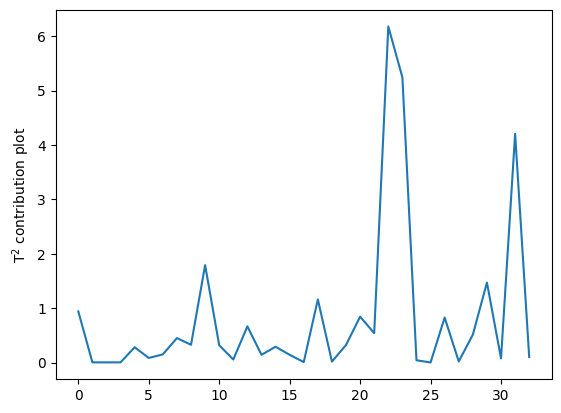

In [65]:
# T2 contribution 
sample = 85 - 69 
data_point = np.transpose(data_test_normal[sample-1,]) 
D = np.dot(np.dot(P_matrix,lambda_k_inv),P_matrix.T) 
T2_contri = np.dot(scipy.linalg.sqrtm(D),data_point)**2 # vector of contributions 
plt.figure() 
plt.plot(T2_contri)
plt.ylabel('T$^2$ contribution plot') 


([<matplotlib.lines.Line2D at 0x1ac01789970>],
 Text(0, 0.5, 'SPE contribution plot'))

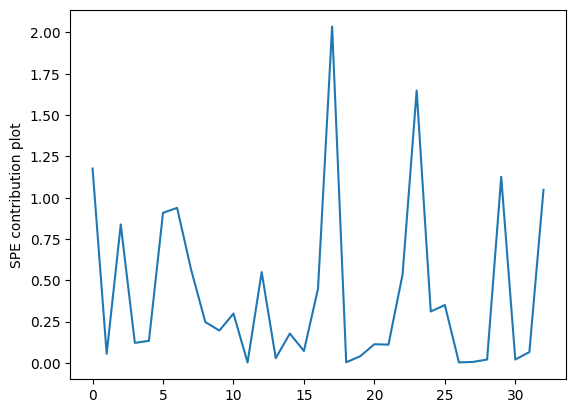

In [66]:
# SPE contribution 
error_test_sample = error_test[sample-1,] 
SPE_contri = error_test_sample*error_test_sample # vector of contributions
plt.figure() 
plt.plot(SPE_contri), plt.ylabel('SPE contribution plot')

PCA Dinâmico (DPCA)

In [68]:
# augment training data 
lag = 5 
N = data_train.shape[0]
m = data_train.shape[1] 
data_train_augmented = np.zeros((N-lag,(lag+1)*m)) 
for sample in range(lag, N): 
    dataBlock = data_train.iloc[sample-lag:sample+1,:].values # pandas dataframe to NumPy array 
    data_train_augmented[sample-lag,:] = np.reshape(dataBlock, (1,-1), order = 'F')
